In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.metrics import roc_auc_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

train_data = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')

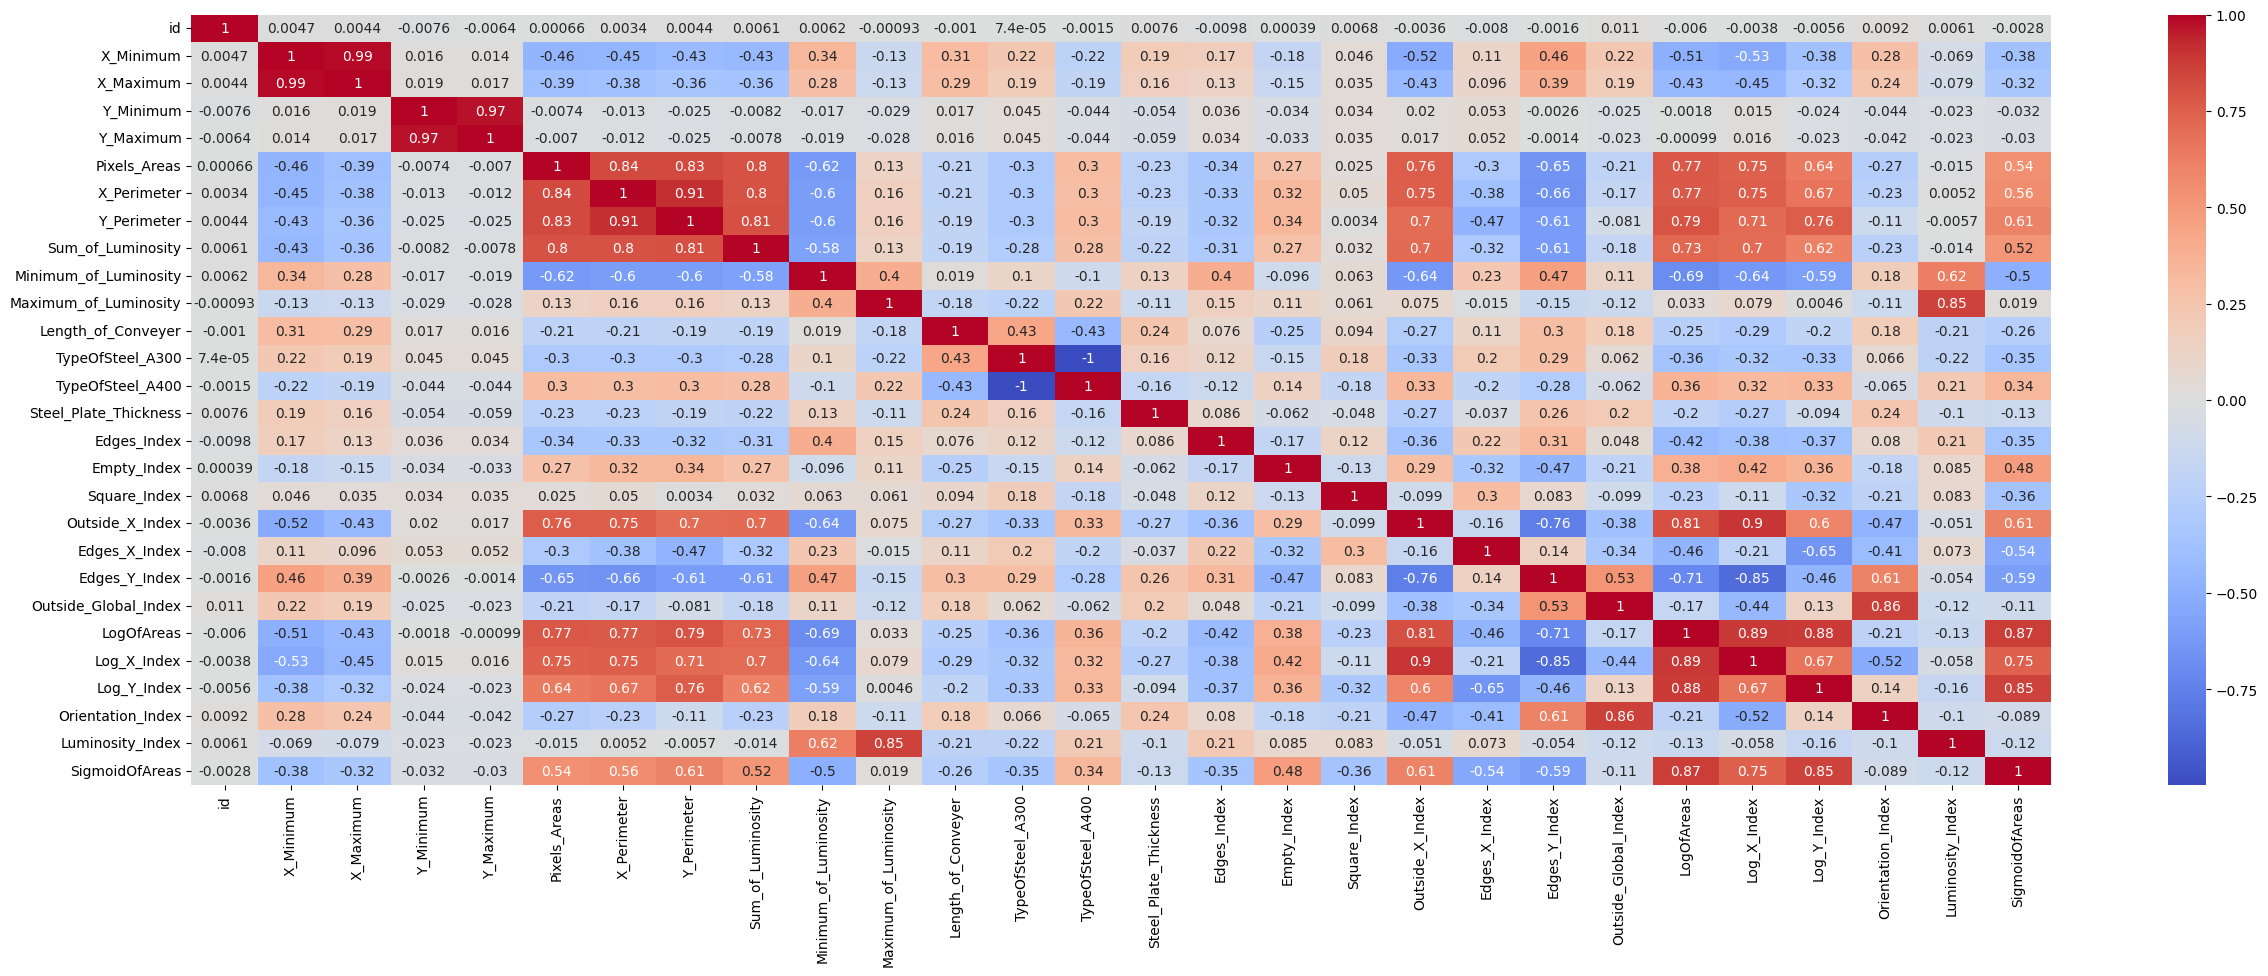

In [88]:
plt.figure(figsize=(30,10))
sns.heatmap(data=train_data.iloc[:, :-7].corr(), annot=True, cmap='coolwarm');

<Axes: >

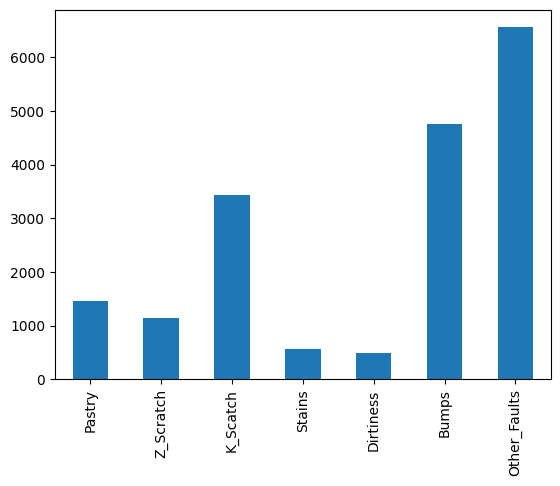

In [89]:
defect_df=train_data[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum(axis=0).plot(kind='bar')
defect_df

In [90]:
train_data['target'] = np.where(train_data['Pastry']==1, 'Pastry',
                           np.where(train_data['Z_Scratch']==1, 'Z_Scratch',
                                    np.where(train_data['K_Scatch']==1, 'K_Scatch',
                                             np.where(train_data['Stains']==1, 'Stains',
                                                      np.where(train_data['Dirtiness']==1, 'Dirtiness',
                                                               np.where(train_data['Bumps']==1, 'Bumps', 'Other_Faults'))))))

In [93]:
X = train_data.drop(columns=['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults','target'], axis=1)
Y = train_data['target']

In [94]:
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,584,590,909972,909977,16,8,5,2274,113,140,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509


In [95]:
Y

0              Stains
1        Other_Faults
2            K_Scatch
3            K_Scatch
4        Other_Faults
             ...     
19214          Stains
19215    Other_Faults
19216          Pastry
19217    Other_Faults
19218           Bumps
Name: target, Length: 19219, dtype: object

In [96]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [97]:
Y


array([5, 3, 2, ..., 4, 3, 0])

# Modelling******

In [106]:
skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42)

In [11]:
skf

RepeatedStratifiedKFold(n_repeats=1, n_splits=10, random_state=42)

# XG_Boost

In [12]:
XGB_cv = cross_val_score(
    XGBClassifier(**{'objective': 'multi:softmax',
                     'num_class': 7,
                     'tree_method': 'hist',
                     'max_depth': 9,
                     'learning_rate': 0.01345813619660515,
                     'n_estimators': 879,
                     'gamma': 1.3709170616495476,
                     'min_child_weight': 34,
                     'colsample_bytree': 0.3917832805927743,
                     'subsample': 0.8450617720822324}),
    X, 
    Y, 
    scoring='roc_auc_ovr',  
    cv=skf, 
    n_jobs=-1
)

print(f"The average 10-folds oof ROC-AUC score of the XGBoost model is {XGB_cv.mean()}")

The average 10-folds oof ROC-AUC score of the XGBoost model is 0.8909311484158625


In [13]:
XGB_md = XGBClassifier(**{'objective': 'multi:softmax',
                          'num_class': 7,
                          'tree_method': 'hist',
                          'max_depth': 10,
                          'learning_rate': 0.03513993699286939,
                          'n_estimators': 858,
                          'gamma': 2.518374355263247,
                          'min_child_weight': 3,
                          'colsample_bytree': 0.3354444954368183,
                          'subsample': 0.7926423415125474})
XGB_md.fit(X, Y)

test_cv = test_data.drop(columns=['id'], axis=1).copy()

Y_pred_proba = XGB_md.predict_proba(test_cv)

submission3 = pd.DataFrame({'id': test_data['id'],
                           'Pastry': Y_pred_proba[:, 4],
                           'Z_Scratch': Y_pred_proba[:, 6],
                           'K_Scatch': Y_pred_proba[:, 2],
                           'Stains': Y_pred_proba[:, 5],
                           'Dirtiness': Y_pred_proba[:, 1],
                           'Bumps': Y_pred_proba[:, 0],
                           'Other_Faults': Y_pred_proba[:, 3]})

submission3.to_csv('submission3.csv', index=False)
submission3.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.476752,0.001409,0.005362,0.000281,0.018439,0.149067,0.348689
1,19220,0.267310,0.024111,0.014568,0.000571,0.160782,0.151982,0.380676
2,19221,0.003002,0.039958,0.039198,0.000924,0.008965,0.312251,0.595702
3,19222,0.142191,0.002334,0.000974,0.001985,0.013454,0.359626,0.479436
4,19223,0.003637,0.002640,0.001220,0.002340,0.009405,0.552896,0.427863


# Cat_Boost

In [98]:
from catboost import CatBoostClassifier

catboost_params = {
    'objective': 'MultiClass',
    'num_class': 7,
    'tree_method': 'hist',
    'max_depth': 8,
    'learning_rate': 0.03345813619660515,
    'n_estimators': 879,
    'gamma': 1.3709170616495476,
    'min_child_weight': 34,
    'colsample_bytree': 0.3917832805927743,
    'subsample': 0.8450617720822324
}

params = {'learning_rate': 0.001, 'depth': 10, 'iterations': 100}
model = CatBoostClassifier(**params)
model.fit(X, Y)


0:	learn: 1.9439685	total: 340ms	remaining: 33.6s
1:	learn: 1.9419375	total: 686ms	remaining: 33.6s
2:	learn: 1.9400111	total: 979ms	remaining: 31.7s
3:	learn: 1.9380392	total: 1.27s	remaining: 30.4s
4:	learn: 1.9361757	total: 1.56s	remaining: 29.6s
5:	learn: 1.9342940	total: 1.85s	remaining: 29s
6:	learn: 1.9323188	total: 2.14s	remaining: 28.4s
7:	learn: 1.9304349	total: 2.42s	remaining: 27.9s
8:	learn: 1.9285339	total: 2.71s	remaining: 27.4s
9:	learn: 1.9266466	total: 3s	remaining: 27s
10:	learn: 1.9246431	total: 3.29s	remaining: 26.6s
11:	learn: 1.9228169	total: 3.57s	remaining: 26.2s
12:	learn: 1.9209353	total: 3.87s	remaining: 25.9s
13:	learn: 1.9191087	total: 4.15s	remaining: 25.5s
14:	learn: 1.9172409	total: 4.22s	remaining: 23.9s
15:	learn: 1.9153600	total: 4.51s	remaining: 23.7s
16:	learn: 1.9134959	total: 4.8s	remaining: 23.5s
17:	learn: 1.9116967	total: 5.1s	remaining: 23.2s
18:	learn: 1.9098467	total: 5.39s	remaining: 23s
19:	learn: 1.9080841	total: 5.68s	remaining: 22.7s
2

In [85]:
test_cv = test_data.drop(columns=['id'], axis=1).copy()

Y_pred_proba = model.predict_proba(test_cv)

submission3 = pd.DataFrame({'id': test_data['id'],
                           'Pastry': Y_pred_proba[:, 4],
                           'Z_Scratch': Y_pred_proba[:, 6],
                           'K_Scatch': Y_pred_proba[:, 2],
                           'Stains': Y_pred_proba[:, 5],
                           'Dirtiness': Y_pred_proba[:, 1],
                           'Bumps': Y_pred_proba[:, 0],
                           'Other_Faults': Y_pred_proba[:, 3]})

submission3.to_csv('submission3.csv', index=False)
submission3.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.189585,0.104027,0.103073,0.101088,0.119191,0.139766,0.243269
1,19220,0.157342,0.108150,0.105755,0.099753,0.133336,0.162814,0.232850
2,19221,0.104522,0.111158,0.119420,0.105921,0.104189,0.189059,0.265731
3,19222,0.130170,0.112127,0.103875,0.104163,0.106198,0.204419,0.239047
4,19223,0.109336,0.105434,0.101466,0.101458,0.104408,0.245708,0.232190
